In [1]:
# Understanding Dual Moving Average Crossover 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime 

In [2]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


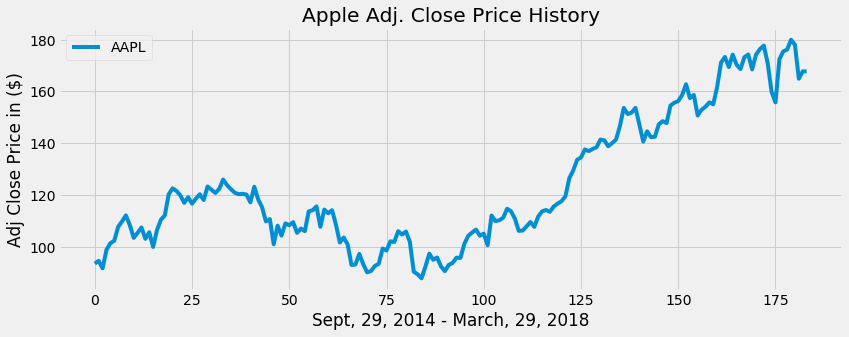

In [3]:
plt.style.use('fivethirtyeight')
#Visualize the Data 
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['Adj Close'], label= 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Sept, 29, 2014 - March, 29, 2018')
plt.ylabel('Adj Close Price in ($)')
plt.legend(loc='upper left')
plt.show()

In [24]:
#Creating a Moving Average With A 30 Day Window
#Short_Term_Average
short_term_data_frame = pd.DataFrame()
short_term_data_frame['Adj Close Price'] = df['Adj Close'].rolling(window= 10).mean()
short_term_data_frame

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,171.895239
180,172.268300
181,171.125209
182,170.129674


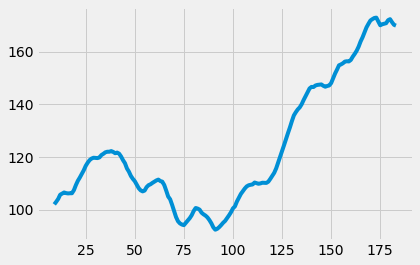

In [25]:
#Ploting The Graph 
plt.plot(short_term_data_frame['Adj Close Price'], label= 'AAPL')

In [26]:
#Create a Simple Moving 100 Day Average 
long_term_data_frame = pd.DataFrame()
long_term_data_frame['Adj Close Price'] = df['Adj Close'].rolling(window=25).mean()
long_term_data_frame

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,167.711370
180,168.802914
181,169.282740
182,169.829325


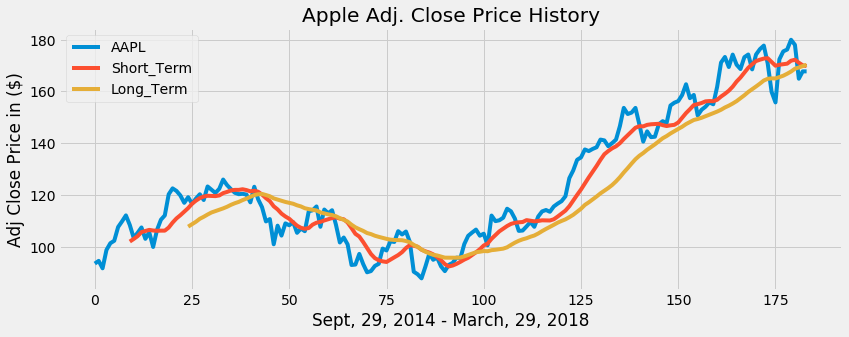

In [27]:
#Visualizing The Data 
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['Adj Close'], label= 'AAPL')
plt.plot(short_term_data_frame['Adj Close Price'], label='Short_Term')
plt.plot(long_term_data_frame['Adj Close Price'], label='Long_Term')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Sept, 29, 2014 - March, 29, 2018')
plt.ylabel('Adj Close Price in ($)')
plt.legend(loc='upper left')
plt.show()
## If Short Term Greater than Long Term : Right Time to sell stock 

In [28]:
#Creating a New Dataframe to Store all the Data
data = pd.DataFrame()
data['stock_price'] = df['Adj Close']
data['short_term_price'] = short_term_data_frame['Adj Close Price']
data['long_term_price'] = long_term_data_frame['Adj Close Price']
data

,stock_price,short_term_price,long_term_price
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN
...,...,...,...
179,179.979996,171.895239,167.711370
180,178.020004,172.268300,168.802914
181,164.940002,171.125209,169.282740
182,167.779999,170.129674,169.829325


In [ ]:
#Create a function To Know When to Buy and When to Sell
def buy_sell(data):
    buy_stock = []
    sell_stock = []
    flag = -1 
    
    for i in range (len(data)):
        if data['short_term_price'][i] > data['long_term_price'][i]:
            if flag != 1 :
                buy_stock.append(data['stock_price'][i])
                sell_stock.append(np.nan)
                flag = 1 
            else :
                buy_stock.append(np.nan)
                sell_stock.append(np.nan)
        elif data['short_term_price'][i] < data['long_term_price'][i]:
            if flag != 0 :
                buy_stock.append(np.nan)
                sell_stock.append(data['stock_price'][i])
            else :
                buy_stock.append(np.nan)
                sell_stock.append(np.nan)
        else :
            buy_stock.append(np.nan)
            sell_stock.append(np.nan)
    return   
    